In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\lehma\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
from sklearn import tree

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
target = df["koi_disposition"]
target_names = ["CONFIRMED", "FALSE POSITIVE"]

# Select your features (columns)

In [6]:
# Set features. This will also be used as your x values.
data = df.drop('koi_disposition', axis=1)

feature_names = data.columns

print(feature_names)


Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg',
       'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1',
       'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')


# Create a Train Test Split

Use `koi_disposition` for the y values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [8]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_scaler = MinMaxScaler().fit(X_train)

In [9]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.790
k: 3, Train/Test Score: 0.897/0.811
k: 5, Train/Test Score: 0.878/0.820
k: 7, Train/Test Score: 0.866/0.823
k: 9, Train/Test Score: 0.856/0.828
k: 11, Train/Test Score: 0.848/0.828
k: 13, Train/Test Score: 0.849/0.822
k: 15, Train/Test Score: 0.841/0.824
k: 17, Train/Test Score: 0.838/0.827
k: 19, Train/Test Score: 0.836/0.824
k: 21, Train/Test Score: 0.839/0.823
k: 23, Train/Test Score: 0.840/0.826
k: 25, Train/Test Score: 0.837/0.824
k: 27, Train/Test Score: 0.836/0.822
k: 29, Train/Test Score: 0.835/0.824
k: 31, Train/Test Score: 0.834/0.820
k: 33, Train/Test Score: 0.835/0.827
k: 35, Train/Test Score: 0.833/0.826
k: 37, Train/Test Score: 0.834/0.822
k: 39, Train/Test Score: 0.833/0.824
k: 41, Train/Test Score: 0.832/0.823
k: 43, Train/Test Score: 0.830/0.823
k: 45, Train/Test Score: 0.828/0.824
k: 47, Train/Test Score: 0.829/0.824
k: 49, Train/Test Score: 0.829/0.825


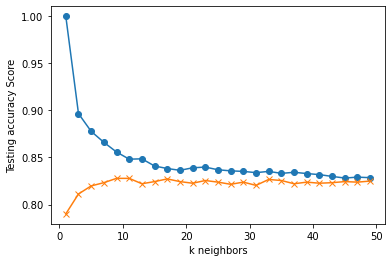

In [10]:
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [11]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train_scaled, y_train)
print('k=33 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=33 Test Acc: 0.827


# Train the Model



In [12]:
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")

Training Data Score: 0.8352088498950982
Testing Data Score: 0.8266590389016019


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [13]:
# Create the GridSearchCV model

In [14]:
# Train the model with GridSearch

In [15]:
print(grid2.best_params_)
print(grid2.best_score_)

NameError: name 'grid2' is not defined

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)